# **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is a critical step in data science that involves summarizing and visualizing the important characteristics of a dataset. This process helps in understanding the data, detecting anomalies, and identifying patterns. Here, I will guide you through performing EDA using a publicly available dataset.

### **Dataset**

We'll use the Titanic dataset from Kaggle, which contains information about passengers on the Titanic and is known for having missing values and other issues.



### **Steps for EDA on a Messy Dataset**
1. Loading the Data
2. Initial Data Inspection
3. Summary Statistics
4. Missing Values Analysis
5. Data Cleaning
6. Data Visualization

#### 1. **Loading the Data**


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [5]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)



URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. **Initial Data Inspection**
Inspect the basic structure and summary of the dataset.

In [ ]:
# Display basic information about the dataset
print(titanic.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Display summary statistics
titanic.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### 3. **Summary Statistics**
Generate summary statistics for numerical and categorical features.

In [ ]:
# Summary statistics for numerical features
numerical_summary = titanic.describe()
numerical_summary




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Summary statistics for categorical features
categorical_summary = titanic.describe(include=['O'])
categorical_summary

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 4. **Missing Values Analysis**
Identify missing values in the dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


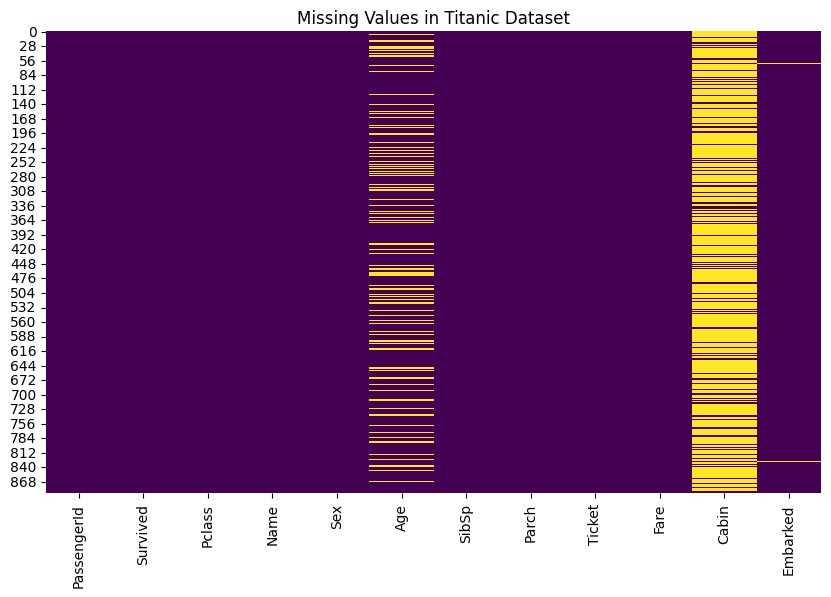

In [ ]:
# Check for missing values
missing_values = titanic.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()


#### 5. **Data Cleaning**
Handle missing values by imputing or dropping them as appropriate.

In [ ]:
# Fill missing values in 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic.drop(columns='Cabin', inplace=True)

# Verify that there are no more missing values
print(titanic.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### 6. **Data Visualization**
Create various plots to visualize the data.

#### **Count Plot for Survival:**
This plot will show the count of passengers who survived and who didn't.

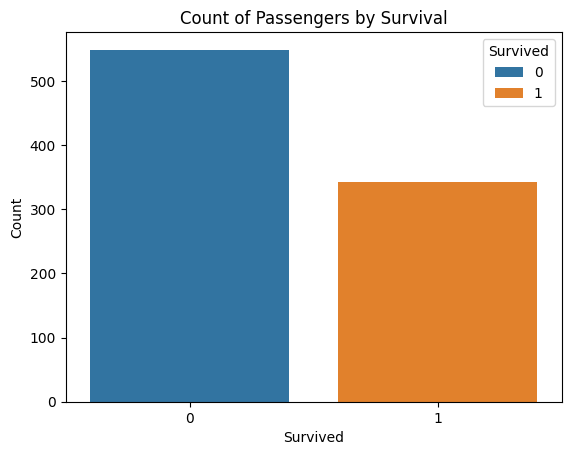

In [ ]:
# Count plot for survival
sns.countplot(x='Survived', data=titanic,hue='Survived')
plt.title('Count of Passengers by Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#### **Bar Plot for Passenger Class (Pclass):**
This plot will show the distribution of passengers across different classes.

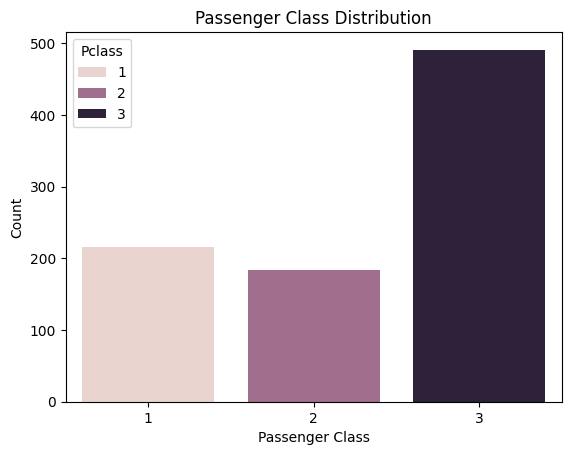

In [ ]:
# Bar plot for passenger class
sns.countplot(x='Pclass', data=titanic,hue='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


#### **Age Distribution:**
A histogram to visualize the age distribution of passengers.

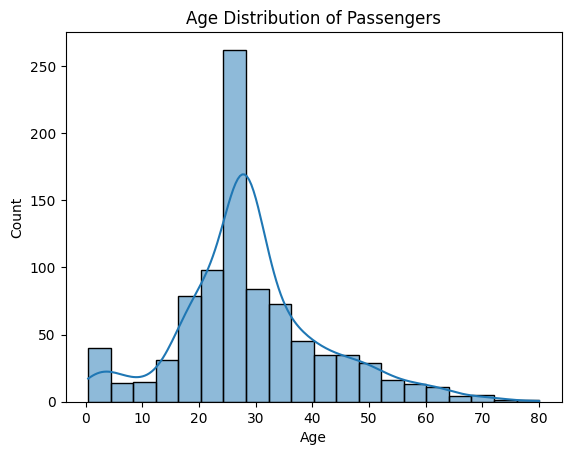

In [ ]:
# Age distribution
sns.histplot(titanic['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### **Survival Rate by Passenger Class:**
A bar plot to show the survival rate based on passenger class.

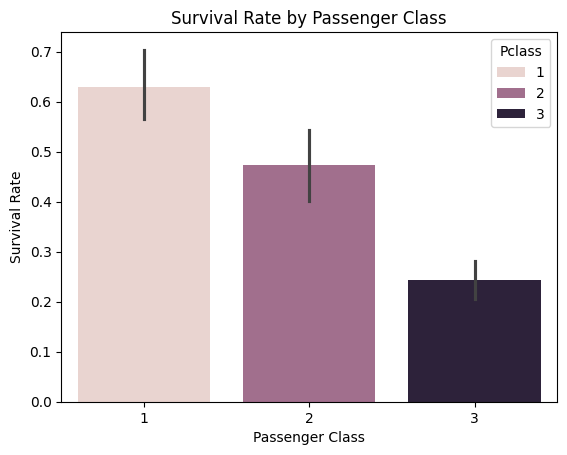

In [ ]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic,hue='Pclass')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


#### **Survival Rate by Sex:**
A bar plot to show the survival rate based on sex.

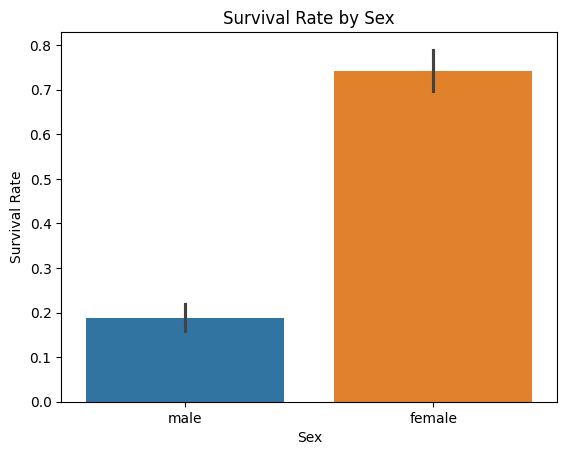

In [ ]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=titanic,hue='Sex')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()


#### **Survival Rate by Sex: Male and Survival Rate by Sex: Female:**

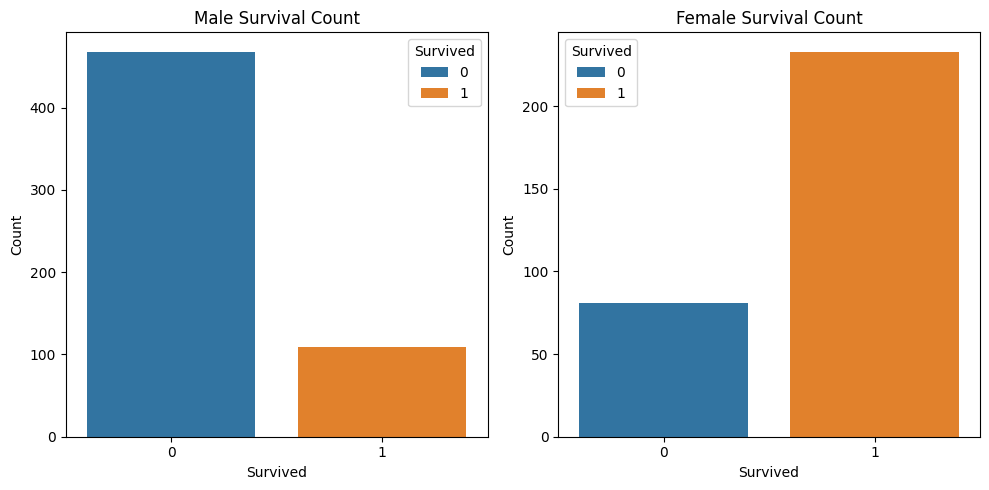

In [ ]:
# Create separate plots for males and females
plt.figure(figsize=(10, 5))

# Plot for males
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=titanic[titanic['Sex'] == 'male'],hue='Survived')
plt.title('Male Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

# Plot for females
plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=titanic[titanic['Sex'] == 'female'],hue='Survived')
plt.title('Female Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### **Survival Rate by Pclass 1, Survival Rate by Pclass 2 and Survival Rate by Pclass 3**

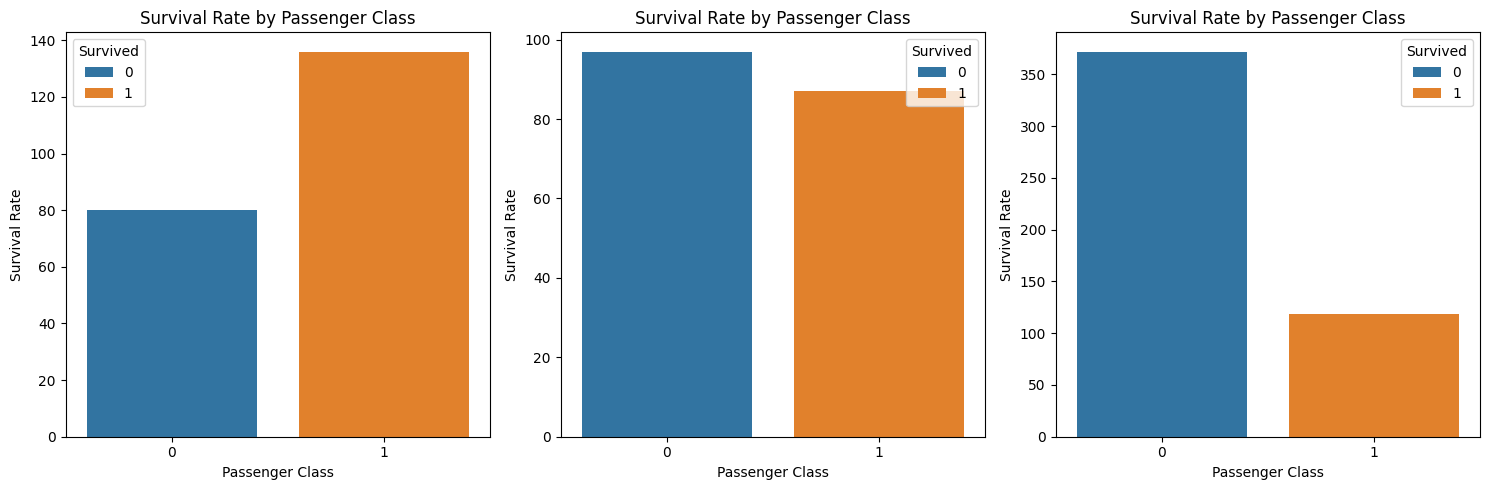

In [ ]:
# Survival rate by passenger class

plt.figure(figsize=(15, 5))


plt.subplot(1,3,1)
sns.countplot(x='Survived', data=titanic[titanic['Pclass']== 1],hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


plt.subplot(1,3,2)
sns.countplot(x='Survived', data=titanic[titanic['Pclass']== 2],hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.subplot(1,3,3)
sns.countplot(x='Survived', data=titanic[titanic['Pclass']== 3],hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')




plt.tight_layout()
plt.show()


#### **Box Plot for Age by Passenger Class:**
This plot will show the distribution of ages across different passenger classes.

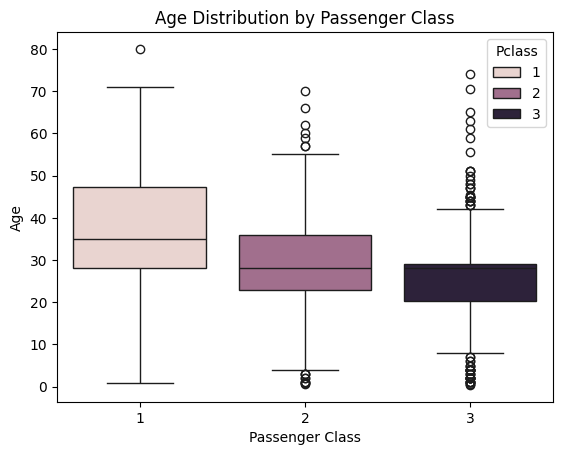

In [ ]:
# Box plot for age by passenger class
sns.boxplot(x='Pclass', y='Age', data=titanic,hue='Pclass')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


#### **Box Plot for Fare by Passenger Class:**
This plot will show the distribution of fares across different passenger classes.

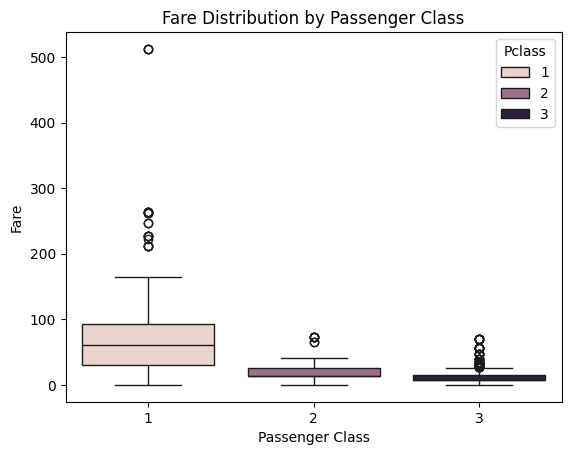

In [ ]:
# Box plot for fare by passenger class
sns.boxplot(x='Pclass', y='Fare', data=titanic,hue='Pclass')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


#### **Box Plot for Age by Survival:**
This plot will show the distribution of ages for passengers who survived and those who didn't.

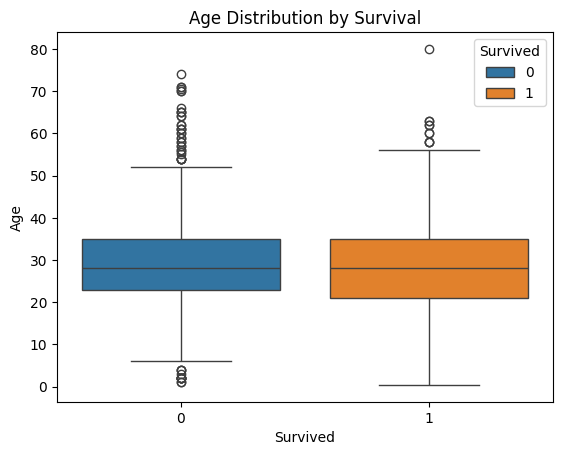

In [ ]:
# Box plot for age by survival
sns.boxplot(x='Survived', y='Age', data=titanic,hue='Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


#### **Box Plot for Fare by Survival:**
This plot will show the distribution of fares for passengers who survived and those who didn't.

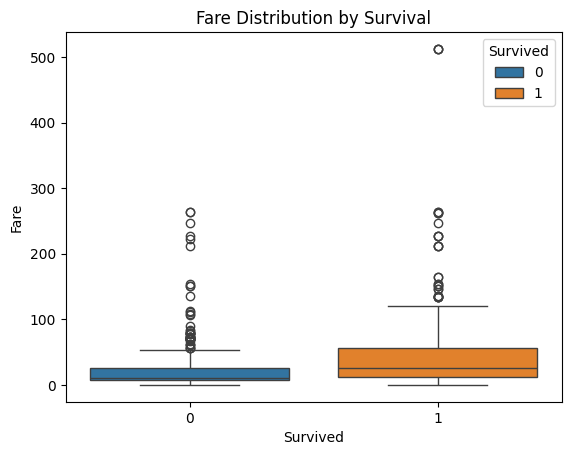

In [ ]:
# Box plot for fare by survival
sns.boxplot(x='Survived', y='Fare', data=titanic,hue='Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


#### **Correlation of the numerical features**

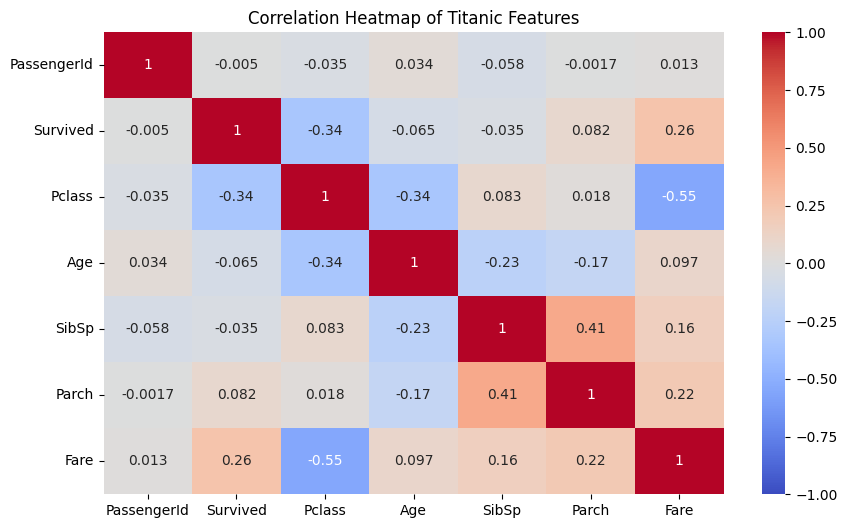

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numerical_cols = titanic.select_dtypes(include=['float64','int64'])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Titanic Features")
plt.show()


### **Dataset 2**

Let's use the "House Prices" dataset from Kaggle, which contains data on residential homes in Ames, Iowa. This dataset includes various features and requires some cleaning and exploration

#### 1. **Loading the Data**
First, we'll load the dataset using pandas.

In [ ]:
# Load the House Prices dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
house_prices = pd.read_csv(url)




In [ ]:
# Display the first few rows of the dataset
house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2. **Initial Data Inspection**
Inspect the basic structure and summary of the dataset.

In [ ]:
# Display basic information about the dataset
house_prices.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Display summary statistics
house_prices.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


#### 3. **Summary Statistics**
Generate summary statistics for numerical and categorical features.



In [ ]:
# Summary statistics for numerical features
numerical_summary = house_prices.describe()
numerical_summary



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Summary statistics for categorical features
categorical_summary = house_prices.describe(include=['O'])
categorical_summary


,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


#### 4. **Missing Values Analysis**
Identify missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = house_prices.isnull().sum()
print(missing_values)




longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


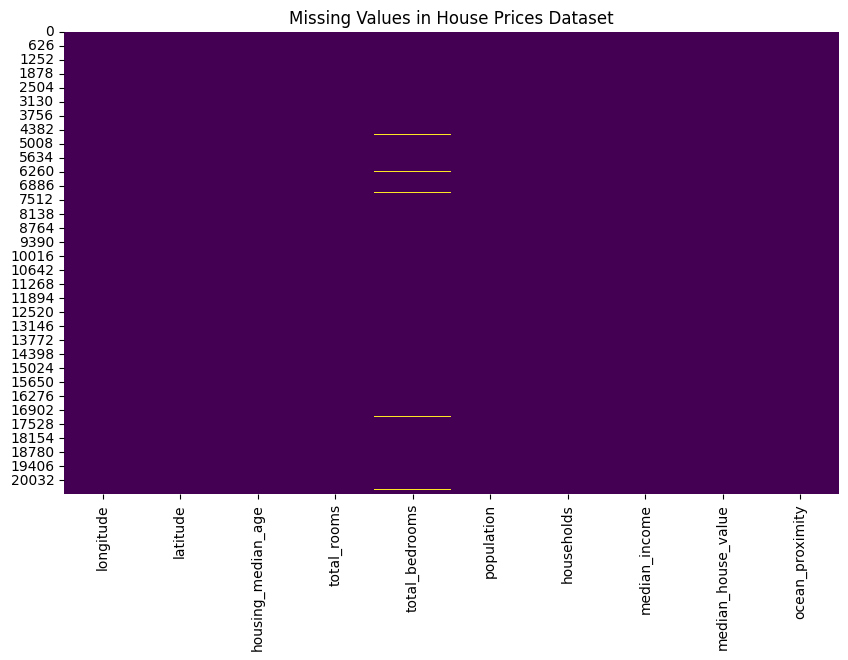

In [ ]:
# Visualize missing values


plt.figure(figsize=(10, 6))
sns.heatmap(house_prices.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in House Prices Dataset')
plt.show()

#### 5. **Data Cleaning**
Handle missing values by imputing or dropping them as appropriate.

In [ ]:
# Fill missing values with median for numerical columns
for col in house_prices.select_dtypes(include=['float64', 'int64']).columns:
    house_prices[col].fillna(house_prices[col].median(), inplace=True)





In [ ]:
#A demonstration of how to fill missing values with the mode for categorical columns in situations where there are many categorical columns with missing values
for col in house_prices.select_dtypes(include=['object']).columns:
    house_prices[col].fillna(house_prices[col].mode()[0], inplace=True)


In [ ]:
# Verify that there are no more missing values
print(house_prices.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### 6. **Data Visualization**
Create various plots to visualize the data.

#### **Count Plot for Ocean Proximity:**
This plot will show the count of instances for each category of ocean proximity.

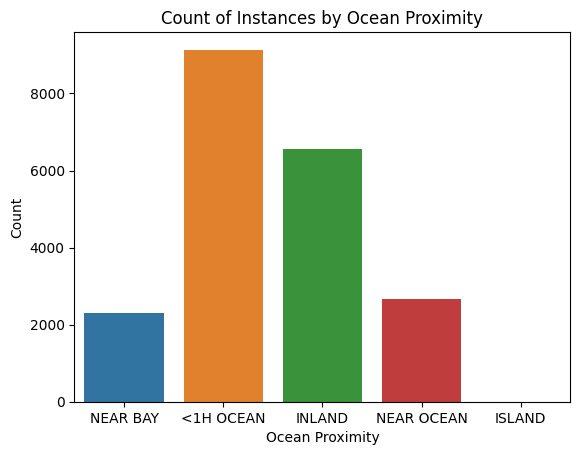

In [ ]:
# Count plot for ocean proximity
sns.countplot(x='ocean_proximity', data=house_prices,hue='ocean_proximity')
plt.title('Count of Instances by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()


#### **Box Plot for Median House Value by Ocean Proximity:**
A box plot to show the distribution of median house value based on ocean proximity.

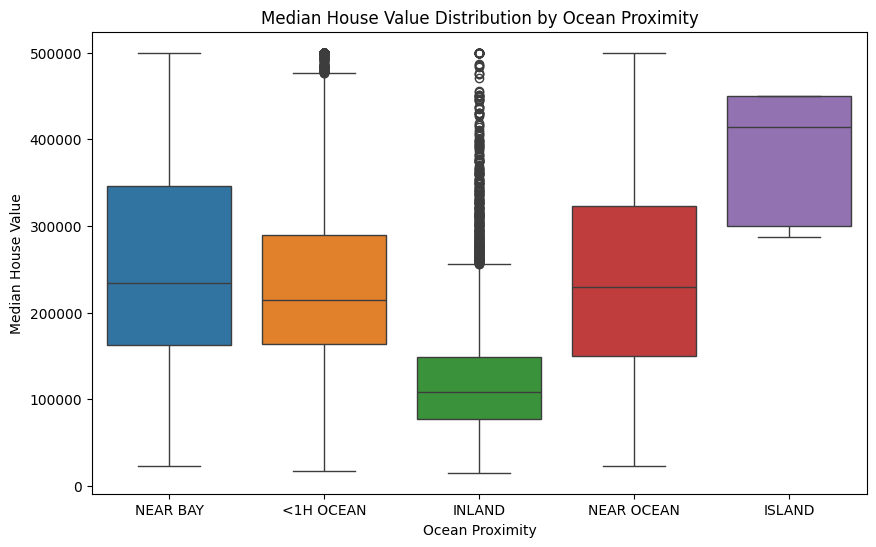

In [ ]:
# Box plot for median house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=house_prices,hue='ocean_proximity')
plt.title('Median House Value Distribution by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


#### **Scatter Plot for Population vs. Total Bedrooms:**
A scatter plot to visualize the relationship between population and total bedrooms.

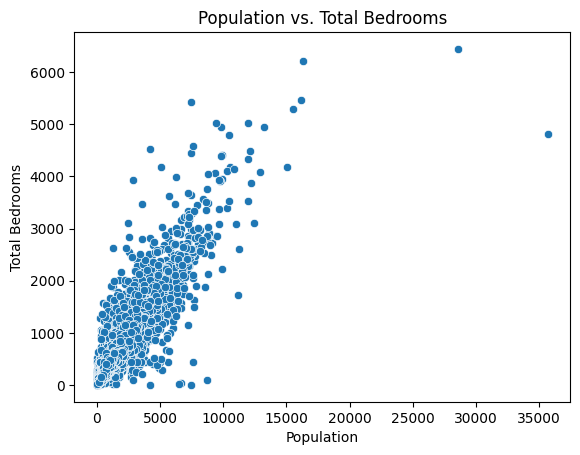

In [ ]:
# Scatter plot for population vs. total bedrooms
sns.scatterplot(x='population', y='total_bedrooms', data=house_prices)
plt.title('Population vs. Total Bedrooms')
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()


#### **Bar Plot for Housing Median Age by Ocean Proximity:**
A bar plot to show the median housing age for each category of ocean proximity.

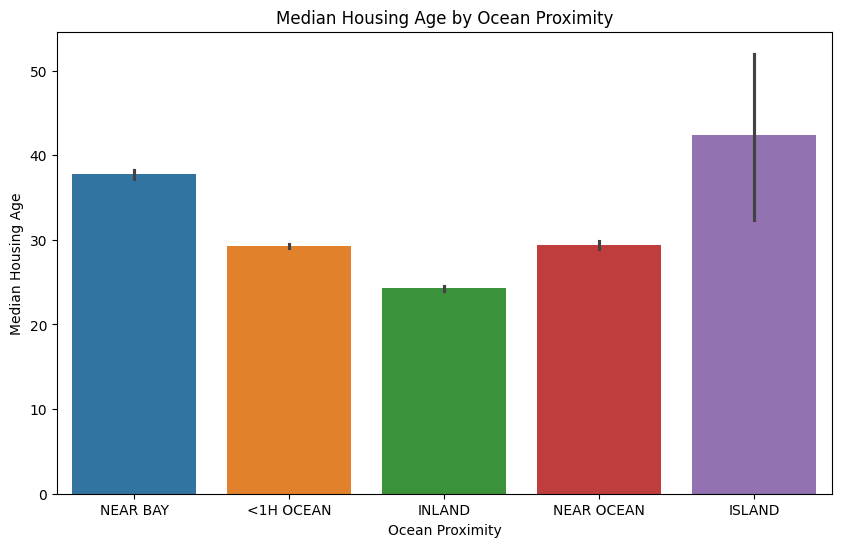

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='housing_median_age', data=house_prices,hue='ocean_proximity')
plt.title('Median Housing Age by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Housing Age')
plt.show()


#### **Bar Plot for Total Bedrooms by Ocean Proximity:**
A bar plot to show the total bedrooms for each category of ocean proximity.

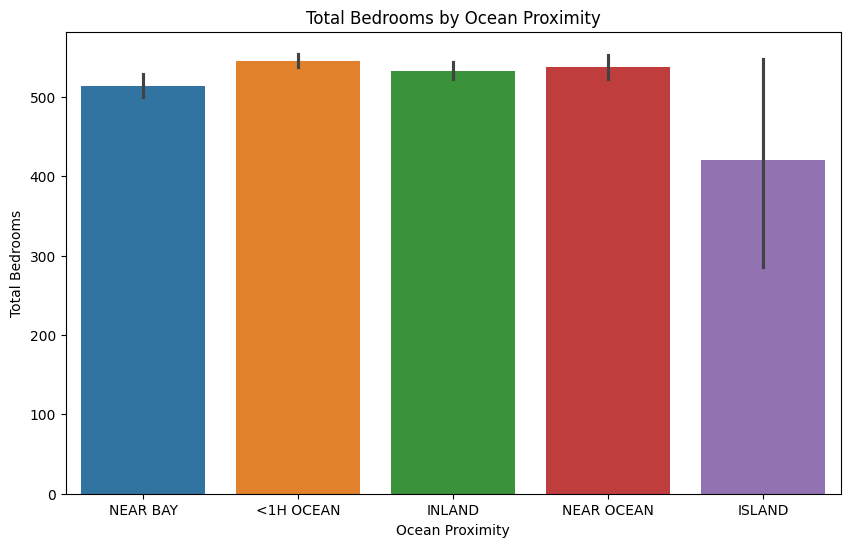

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='total_bedrooms', data=house_prices,hue='ocean_proximity')
plt.title('Total Bedrooms by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Bedrooms')
plt.show()


#### **Bar Plot for Population by Ocean Proximity:**
A bar plot to show the population for each category of ocean proximity.

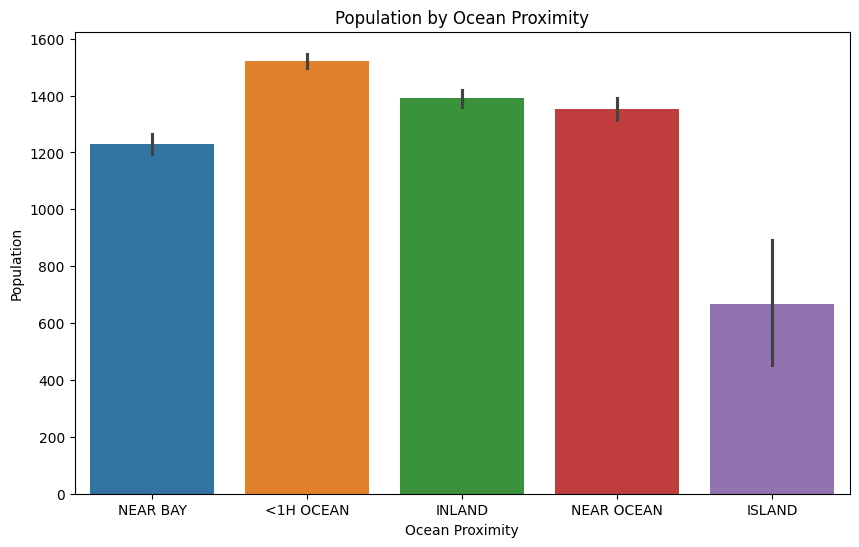

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='population', data=house_prices,hue='ocean_proximity')
plt.title('Population by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()


#### **Bar Plot for Total Rooms per Household by Ocean Proximity:**
A bar plot to show the average number of total rooms per household for each category of ocean proximity.

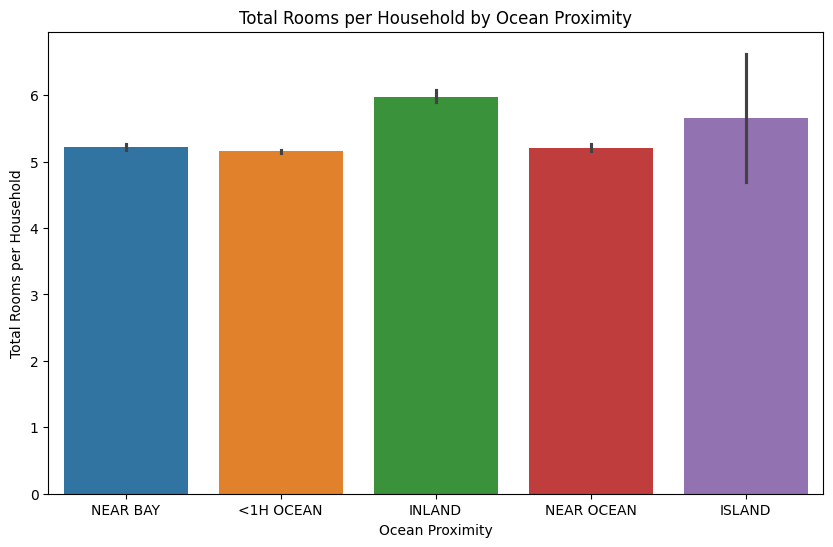

In [ ]:
# Calculate total rooms per household
house_prices['total_rooms_per_household'] = house_prices['total_rooms'] / house_prices['households']

plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='total_rooms_per_household', data=house_prices,hue='ocean_proximity')
plt.title('Total Rooms per Household by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Rooms per Household')
plt.show()


#### **Correlation of Numerical Features**

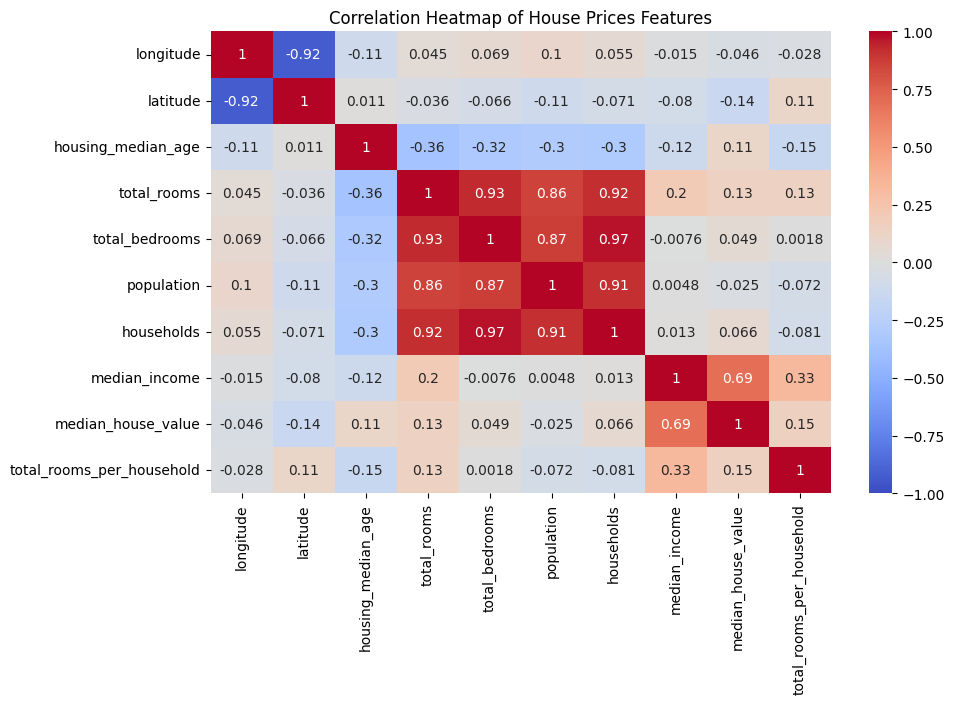

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numerical_cols = house_prices.select_dtypes(include=['float64','int64'])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of House Prices Features")
plt.show()
